In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
pwd

'/content'

In [ ]:
!kaggle datasets list

ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                   Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           9406        313  1.0              
arjunajn/netflix-watch-log                                        Netflix Watch Log                                  295KB  2023-08-22 08:23:45            604         28  1.0              
vincentcornlius/sales-orders                                      sales orders                                         5MB  2023-08-24 14:04:11            717         23  0.8235294        
kapturovalexander/gold-and-silver-prices-2013-2023     

In [ ]:
! kaggle datasets download -d tongpython/cat-and-dog

 98% 214M/218M [00:01<00:00, 187MB/s]
100% 218M/218M [00:01<00:00, 132MB/s]


In [ ]:
!unzip -q /content/cat-and-dog.zip

# Model Building

In [ ]:
# crating the object
model=tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
#second cnn
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
#Adding fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
# Add output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0

In [ ]:
# model compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

# Training data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data_dir='/content/training_set/training_set'
test_data_dir='/content/test_set/test_set'

In [ ]:
# rescale images
Datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=Datagen.flow_from_directory(directory=training_data_dir,target_size=(32,32), classes=['dogs','cats'],class_mode='binary',batch_size=20)

Found 8005 images belonging to 2 classes.


In [ ]:
test_set=Datagen.flow_from_directory(directory=test_data_dir,target_size=(32,32), classes=['dogs','cats'],class_mode='binary',batch_size=20)

Found 2023 images belonging to 2 classes.


In [ ]:
len(training_set),len(test_set)

(401, 102)

In [ ]:
len(training_set)*20,len(test_set)*20

(8020, 2040)

In [ ]:
test_set.class_mode

'binary'

In [ ]:
history=model.fit_generator(training_set,steps_per_epoch=401,epochs=20,validation_data=test_set,validation_steps=102)

Epoch 1/20


<ipython-input-29-7bfccd66f0d7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(training_set,steps_per_epoch=401,epochs=20,validation_data=test_set,validation_steps=102)


401/401 [==============================] - 27s 36ms/step - loss: 0.6622 - accuracy: 0.5929 - val_loss: 0.6193 - val_accuracy: 0.6658
Epoch 2/20
401/401 [==============================] - 15s 38ms/step - loss: 0.5976 - accuracy: 0.6785 - val_loss: 0.6071 - val_accuracy: 0.6569
Epoch 3/20
401/401 [==============================] - 15s 37ms/step - loss: 0.5578 - accuracy: 0.7054 - val_loss: 0.5506 - val_accuracy: 0.7266
Epoch 4/20
401/401 [==============================] - 15s 36ms/step - loss: 0.5262 - accuracy: 0.7380 - val_loss: 0.5182 - val_accuracy: 0.7523
Epoch 5/20
401/401 [==============================] - 14s 35ms/step - loss: 0.4988 - accuracy: 0.7544 - val_loss: 0.5067 - val_accuracy: 0.7637
Epoch 6/20
401/401 [==============================] - 14s 34ms/step - loss: 0.4733 - accuracy: 0.7699 - val_loss: 0.4859 - val_accuracy: 0.7736
Epoch 7/20
401/401 [==============================] - 14s 35ms/step - loss: 0.4351 - accuracy: 0.7956 - val_loss: 0.4973 - val_accuracy: 0.7662
Epo

# plotting and learn curve

In [ ]:
def learning_curve(history,epoch):
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model_accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  #plt.legend(['Train','val'],loc='upper_right')
  plt.show()
  #loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model_loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  #plt.legend(['Train','val'],loc='upper_left')
  plt.show()


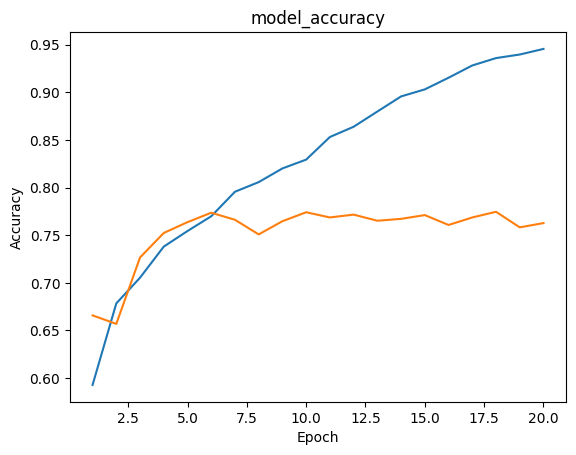

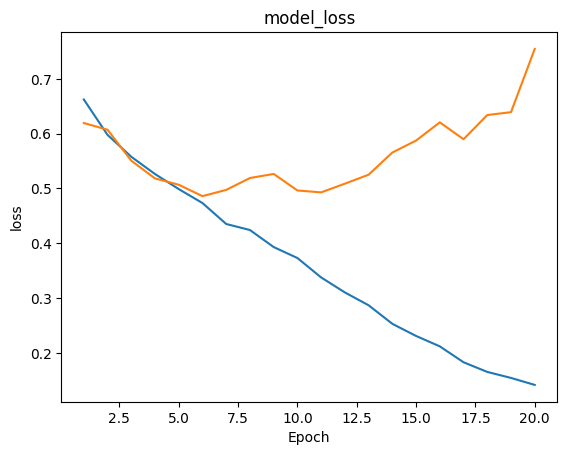

In [ ]:
learning_curve(history,20)